# Importing Libraries

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [187]:
df=pd.read_csv("playstore-analysis_01.csv")

In [188]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [189]:
#here we are checking the current working directry 
os.getcwd()

'C:\\Users\\win\\Python For Data Analyst'

In [190]:
#Description of the dataet
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [191]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [192]:
#Shape of the Dataset
df.shape

(10841, 13)

In [193]:
#Count the number of missing value in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [194]:
#Changing the name of the given dataset
df.rename({"Content Rating":"Content_Rating","Last Updated":"Last_Update","Current Ver":"Current_Ver","Android Ver":"Android_Ver"},axis=1,inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Update     10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# 
Tasks

# 1. Data Cleaning Up - Missing Value Treatment

# a. Drop Record where rating is missing since rating is our target/Study variable

In [196]:
#Checking Which Column has Null Value
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Update          0
Current_Ver          8
Android_Ver          3
dtype: int64

In [197]:
df[df["Rating"].isnull()].index

Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,   185,
       ...
       10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835, 10838],
      dtype='int64', length=1474)

In [198]:
#Droping The null values form the rating column
df.drop(index=df[df["Rating"].isnull()].index,inplace=True)

In [199]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Update       0
Current_Ver       4
Android_Ver       3
dtype: int64

In [200]:
# B. Checking The Null value from The Android Ver column
df[df["Android_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# i Are all 3 records having a same problem ?
#### Yes,All these 3 Records having a same Probelm in Android Ver Column

# ii Drop The 3rd Record i.e. record for "Life Made Wifi..."

In [201]:
df.drop([10472],inplace=True)


In [202]:
df[df["Android_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### We Successfully Drop The 3rd Record

# iii Replace Remaining Missing Value with The Mode

In [203]:
#Here We Are Finding The mode value of the column Android_Ver and storing it in the new variable called x
x=df["Android_Ver"].mode()[0]
x


'4.1 and up'

In [204]:
# Filling those null value with the mode() value
df["Android_Ver"].fillna(x,inplace=True)

In [205]:
df[df["Android_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


In [206]:
# Here There is no null value in the Android_Ver Column


# C. Current_Ver- Replace With Most Common Value


In [207]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Update       0
Current_Ver       4
Android_Ver       0
dtype: int64

In [208]:
#Finding The Null Value for the Current Ver and Storing it in the new variable called Y
y=df["Current_Ver"].mode()[0]
y

'Varies with device'

In [209]:
#Filling Those Null value with the Mode() value
df["Current_Ver"].fillna(y,inplace=True)

In [210]:
df[df["Current_Ver"].isnull()]
#There is no null value Present in the Current_Ver Column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


# 2. Data Clean Up- Correcting the Data Types

# a. Which all variables need to be brought to numeric types ?

In [211]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Update     9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# b. Price Vriable-Remove $ sign and covert to Float 

In [213]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### Here we are replacing the $ sign and also converting the types of it to the numeric


In [214]:
df["Price"]=pd.to_numeric(df["Price"].str.replace("$"," "))

In [215]:
df.info()
# price is Convert Object to Float

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Update     9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


# c. Installs - Remove ',' and '+' sign , convert to integer


In [216]:
df["Installs"] = pd.to_numeric(df["Installs"].str.replace(",","").str.replace("+",""))


In [217]:
df.info()
# Installs is convert object into int64

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Update     9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [218]:
df.head(5)
# Here You can see that "," and "+" sign is removed


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# d. Convert All Other identified Coloumn to numeric


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Update     9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


##### From the given info, we have already converted the identifies columns into the numeric type so now, there are no such columns which we need to convert to numeric type

# 3. Sanity Checks - Check for the Following and handle accordingly

 # a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

# i. Are Any such records? drop if so

In [220]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [221]:
df[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


#### There Are No such records which have rating greater than 5, so we don't need to drop anything in the given dataset

# b. Reviews Should not be more than Installs as only those who installed can review the app

# i. Are There Any Such Records ? Drop if so

In [222]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### Changing The Types Of The Review Coloumn

In [223]:
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [224]:
sum(df["Reviews"]>df["Installs"])

7

In [225]:
pd.set_option("display.max_columns",None)

In [226]:
df[df["Reviews"]>df["Installs"]].index

Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [227]:
df.iloc[[600]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
618,FREE LIVE TALK,DATING,4.9,776,4900.0,5000,Free,0.0,Mature 17+,Dating,"July 14, 2018",8.2,4.0.3 and up


In [228]:
df.drop(index=df[df["Reviews"]>df["Installs"]].index,inplace=True)

In [229]:
df[df["Reviews"]>df["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


##### After performing the operations, we found 7 such records which were greater than the installs so we droped those records So, 
##### now there are no such records that is Review which are greater than the installs

# 4. Identifiers And Handle Outliers

# a. Price Columns

# i. Make Suitable Plot to identify ouliters in price

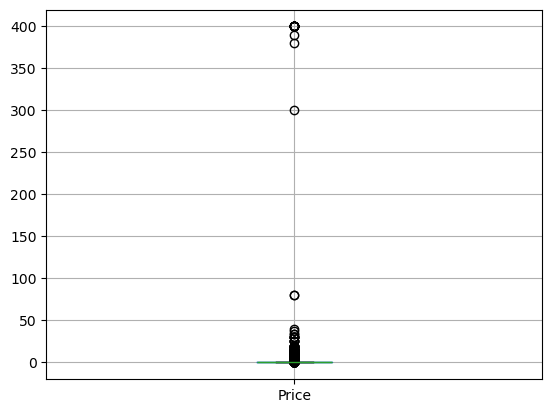

In [230]:
df.boxplot("Price")

plt.show()

##### So, after ploting the boxplot for the Price column, we can see that there are some outliers present in the price column And from this we can assume that, there are outliers beyond value 50

# ii. Do you expect apps on the playstore to cost $200 ? Check Out this Cases

In [231]:
df[df["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [232]:
sum(df["Price"]>200)

15

In [233]:
df[df["Price"]>200].index

Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362, 5364,
       5366, 5369, 5373],
      dtype='int64')

In [234]:
df.drop(index=df[df["Price"]>200].index,inplace=True)

In [235]:
df[df["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


##### Here we have droped the records which are greater than 200 (cost more than 200)

# iii. After droping the useless records, make suitable plots again to identify outiers

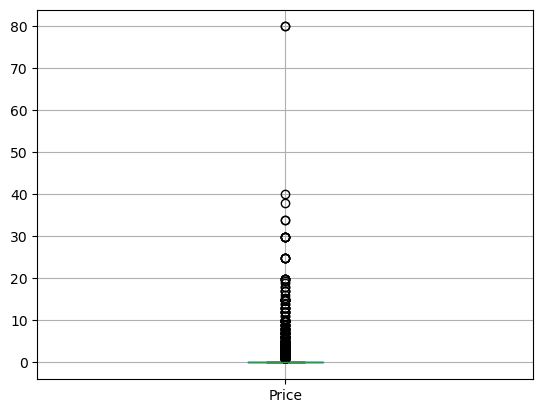

In [237]:
df.boxplot("Price")
plt.show()


##### After ploting the boxplot for the price column, we got some outliers which we can see and we can say that the outliers are beyond 50 or we can also say that there are outliers beyond the average line so we can also drop that

# iv. Limit Data to Record with price < $30

In [238]:
sum(df["Price"]<30)

9338

# b. Review Column
# i. Making Suitable Plot

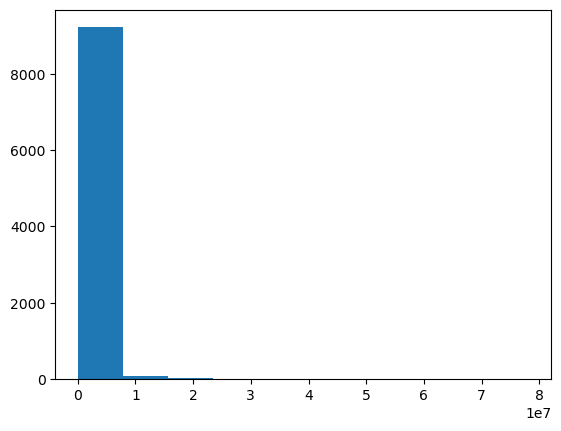

In [239]:
h=df["Reviews"]
plt.hist(h)
plt.show()

# ii. Limit Data To apps with < 1 Million reviews

In [240]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [243]:
df[df["Reviews"]<1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [244]:
sum(df["Reviews"]<1000000)

8640

# C. Installs
# i. What is the 95th Percentile of the installs?

In [252]:
# Getting The Value of the installs columns with 95th Percentile
df["Installs"].quantile(0.95)

100000000.0

##### ii. Drop record having a value more than 95th Percentile

In [253]:
df[df["Installs"]>df["Installs"].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.52952,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.52952,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.52952,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,21516.52952,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,21516.52952,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,21516.52952,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000.00000,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,21516.52952,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.52952,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [254]:
df[df["Installs"]>df["Installs"].quantile(0.95)].index

Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
       ...
       4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
      dtype='int64', length=130)

In [258]:
# here droping the values which is more than 95th percentile
df.drop(index=df[df["Installs"]>df["Installs"].quantile(0.95)].index,inplace=True)

In [259]:
df[df["Installs"]>df["Installs"].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver


##### Here, We Are Dropped all the installs vablues which is more than 95th Percentile


# Data Analysis To Answer Business Question
# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\win\AppData\Local\Temp\ipykernel_12492\2606352060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"],color='red',bins = 30)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


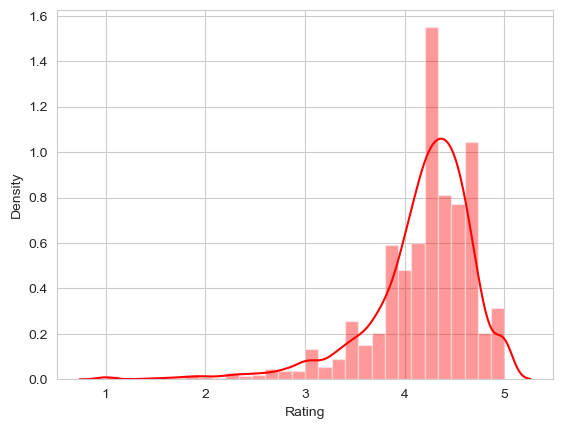

In [271]:
sns.set_style("whitegrid")
sns.distplot(df["Rating"],color='red',bins = 30)
plt.show()

In [262]:
# Finding The Skewed Value for Rating Column
df["Rating"].skew()

-1.751536686534869

# a. How do you explain this ?
#### So, From above plot we can see that the skewed vlaue is at the left side which is left side, so we can say that the given column or the given plot is left skewed

# b.What is the implication of this on your analysis ?
#### If we have more data then generally there is skewed value present in that dataset.And if there is too many skewed values present in the dataset that is too much skewness present in the coloumn then whatever the model we have, it does't work properly (Statistical Model) So, if we have skewness data and if it's at the right side then it is right skewed data and if the skewness is at the left side then it is left skewed data that is ther are negative values So, to overcome from this and to get the right output from the analysis we can remove this skewness and we can convert it into the bell curve that is the mean is at the centre

# 6. What are the Top content rating values ?

In [272]:
df["Content_Rating"].value_counts()

Content_Rating
Everyone           6829
Teen                927
Mature 17+          421
Everyone 10+        335
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

# a. Are There any values with very few records?

In [273]:
df["Content_Rating"].value_counts()

Content_Rating
Everyone           6829
Teen                927
Mature 17+          421
Everyone 10+        335
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

#### So, after analysis we found that an Adults only 18+ and Unrated have very few records that is 3 and 1 respectively

# b. If Yes Drop those as they won't help in the analysis

In [276]:
# Finding the Adults only 18+ value in the content rating column
df[df["Content_Rating"]=="Adults only 18+"].index

Index([298, 3043, 6424], dtype='int64')

In [277]:
# Finding the Unrated value in the content rating column
df[df["Content_Rating"]=="Unrated"].index

Index([8266], dtype='int64')

In [278]:
# Droping All the values in the given column with the given records
df.drop(index=df[df["Content_Rating"]=="Adults only 18+"].index,inplace=True)
df.drop(index=df[df["Content_Rating"]=="Unrated"].index,inplace=True)

In [279]:
df["Content_Rating"].value_counts()

Content_Rating
Everyone        6829
Teen             927
Mature 17+       421
Everyone 10+     335
Name: count, dtype: int64

#### So, after the operations we found that, the given data doesn't have any value in the Content Rating column with Unrated and Adults only 18+

# 7. Effect of the size on Rating
# Make A join plot to understand the Effect of the size on Rating

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


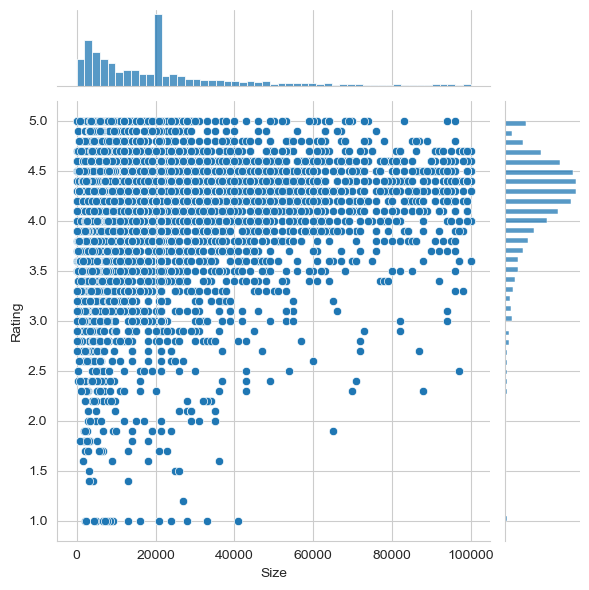

In [281]:
sns.jointplot(x="Size",y="Rating",data=df)
plt.show()

# b. Do you see any patterns?
#### Yes, from the given plot, we can say that there is correlation between Size and Rating

# c. How do you explain the pattern?
#### From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

# 8. Effect of price on rating
# Make A Jointplot (With Regression Line)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


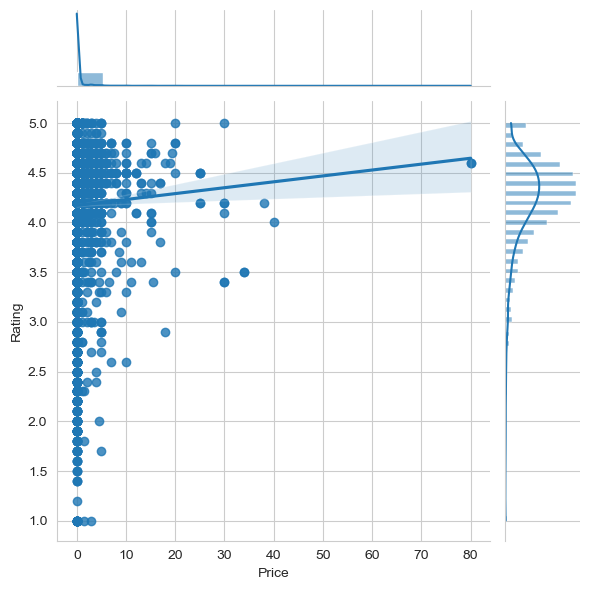

In [282]:
sns.jointplot(x="Price",y="Rating",data=df,kind="reg")
plt.show()

# b. What Pattern do you see ?
#### From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

# c. How do you explain the pattern ?
#### So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price

# d. Replot the data, this time with only records with price > 0


In [289]:
greatervalue = df[df["Price"]>0]
greatervalue


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.00000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.00000,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


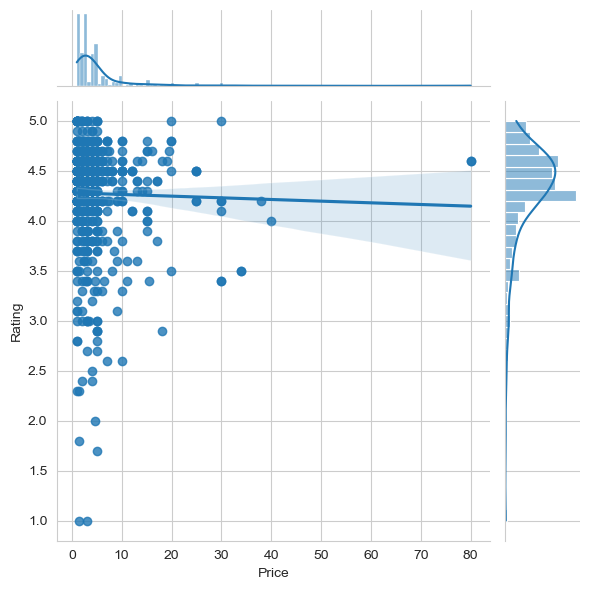

In [290]:
sns.jointplot(x="Price",y="Rating",data=greatervalue,kind="reg")
plt.show()

# e. Does the pattern change?
#### Yes, the pattern has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

# f. What is your overall inference on the effect of price on the rating
#### So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

# 9. Look At The numeric interactions together-
# a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

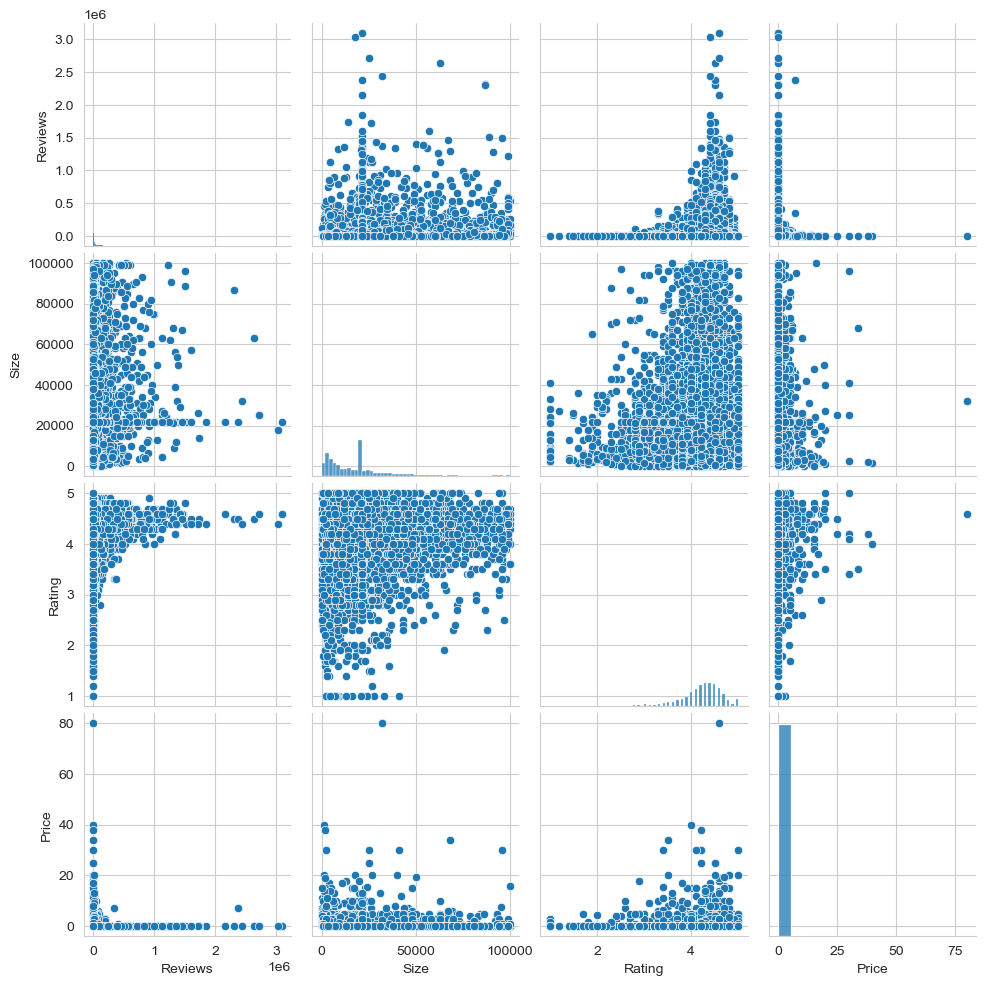

In [295]:
sns.pairplot(df,vars=["Reviews","Size","Rating","Price"])
plt.show()

# 10. Rating vs Content Rating
# a. Make a bar plot diplaying the rating for each content rating


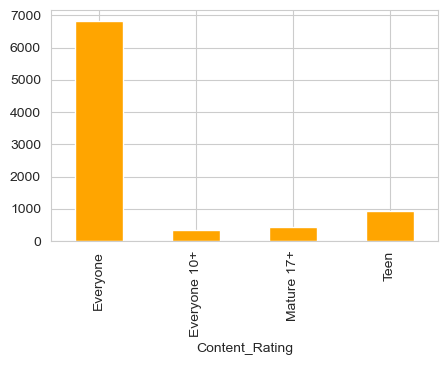

In [303]:
plt.figure(figsize=(5,3))
df.groupby(["Content_Rating"])["Rating"].count().plot.bar(color='orange')
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?
#### Here, we will use Median as we have outlier in the Rating. And, Median is the best measure of central tendency to overcome the outlier

# c. Choose The right metric and plot

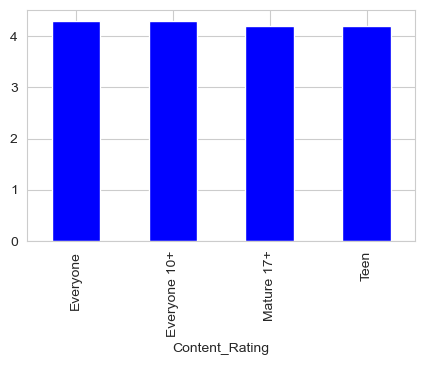

In [307]:
plt.figure(figsize=(5,3))
df.groupby(["Content_Rating"])["Rating"].median().plot.bar(color="blue")
plt.show()

# 11. Content Rating vs Size vs Rating - 3 Variable at a time
# a. Create 5 buckets (20% records in each) based on Size

In [308]:
#creating bins (buckets) of the given dataset and then we're giving labels to it. Basically creating the 5 gourps of the dataset 
bins=[0,20000,40000,60000,80000,100000]
labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k']
df['Bucket']=pd.cut(df['Size'],bins,labels=labels)
pd.pivot_table(df,index='Bucket',values='Rating',columns='Content_Rating')

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,4.145992,4.247561,4.015183,4.182834
20k-40k,4.206859,4.173913,4.160131,4.181410
40k-60k,4.167083,4.263636,4.190476,4.244737
60k-80k,4.243284,4.288889,4.200000,4.290625
80k-100k,4.260127,4.304762,4.252632,4.298571


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [309]:
quant=pd.pivot_table(df, values='Rating', index='Bucket', columns='Content_Rating', aggfunc=lambda x:np.quantile(x,0.2))
quant

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.80,4.02,3.5,3.90
20k-40k,4.00,4.00,4.0,3.90
40k-60k,3.90,4.06,4.1,4.00
60k-80k,3.90,4.02,4.0,4.00
80k-100k,4.04,4.10,4.0,4.08


# c. Make a heatmap of this
# i. Annotated

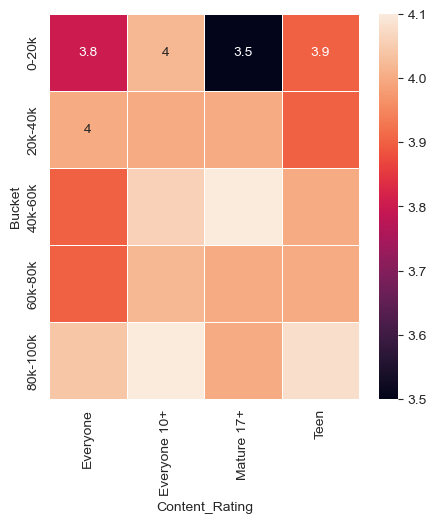

In [311]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(quant, annot=True, linewidths=.5)
plt.show()

# ii. Green Color Map

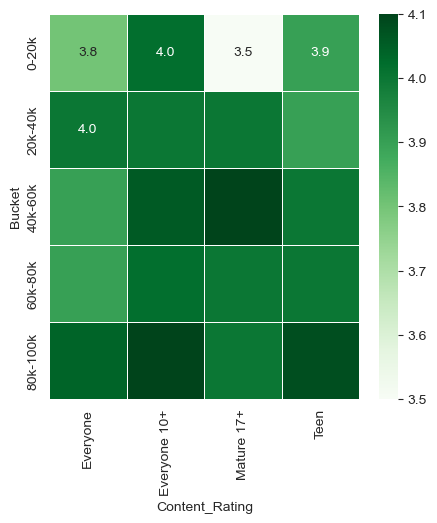

In [312]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(quant, annot=True, cmap='Greens', linewidths=.5, fmt='.1f')
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
#### From this analysis and plot, we can see that the lighter apps are not preffered in all the categories. Apps with size 40k-60k and 80k-100k have more ratings and also we can say that the size 60k-80k also has the high ratings. So, in short we can say that, whatever the heavier apps are there, they are preferred more in all the caregories